In [44]:
# Imports
import datetime
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import scipy

%matplotlib inline
plt.style.use('bmh')

import warnings

# Suppress warnings from seaborn
warnings.filterwarnings("ignore")

In [45]:
#below all subdirectories are searched for data files

all_files = []
file_end = 'segments.csv'
def read(root):
    for (dir_path, dir_names, files) in os.walk(root):
        for file in files:
             if file.lower().endswith(file_end.lower()):
                paths= re.split(r"[/\\]", dir_path.lower())
                print(paths)
                df = pd.read_csv(os.path.join(dir_path, file),
                                 )#names=["bwd_path0","bwd_path1","srtt_path0","srtt_path1","loss_path0","loss_path1"]
                #print(file)
                df['trace'] = int(file.split("_")[0])
                df['model'] = paths[-2].split("_")[-2] + paths[-2].split("_")[-3]
                #based on subdirectory, is the download a video or a file
                #df['download_type'] = paths[2]
    #
                ##based on subdirectory, what type of mobility are the traces
                #df['trace_mobility'] = paths[3]
    #
                #df['TraceID'] = len(all_files) #each file is a separate trace
                all_files.append(df)
old_lstm = "central_service/runs/20230528_02_22_05_LSTM_test/"
new_lstm = "central_service/runs/20240606_20_35_45_MINRTT_LSTM_test/"
min_rtt = 'central_service/runs/20230529_11_01_43_minrtt_test/'
a2c = "central_service/runs/20230530_00_45_43_a2c_test/"
falcon = "central_service/runs/20240518_11_56_10_FALCON_test/"

runs = [old_lstm, new_lstm, min_rtt] #[old_lstm,new_lstm,min_rtt,a2c,falcon]
if len(runs) >= 1:
    for r in runs:
        read(r)
    df_runs = pd.concat(all_files, ignore_index=True)
    #df_runs
else:
    df_runs = all_files

['central_service', 'runs', '20230528_02_22_05_lstm_test', '']
['central_service', 'runs', '20230528_02_22_05_lstm_test', '']
['central_service', 'runs', '20230528_02_22_05_lstm_test', '']
['central_service', 'runs', '20230528_02_22_05_lstm_test', '']
['central_service', 'runs', '20230528_02_22_05_lstm_test', '']
['central_service', 'runs', '20230528_02_22_05_lstm_test', '']
['central_service', 'runs', '20230528_02_22_05_lstm_test', '']
['central_service', 'runs', '20230528_02_22_05_lstm_test', '']
['central_service', 'runs', '20230528_02_22_05_lstm_test', '']
['central_service', 'runs', '20230528_02_22_05_lstm_test', '']
['central_service', 'runs', '20240606_20_35_45_minrtt_lstm_test', '']
['central_service', 'runs', '20240606_20_35_45_minrtt_lstm_test', '']
['central_service', 'runs', '20240606_20_35_45_minrtt_lstm_test', '']
['central_service', 'runs', '20240606_20_35_45_minrtt_lstm_test', '']
['central_service', 'runs', '20240606_20_35_45_minrtt_lstm_test', '']
['central_service', 

In [46]:
df_runs

,Unnamed: 0,segment_nr,bandwidth,bitrate,down_shifts,buffering_ratio,initial_buffering,stall_count,stall_sum,qoe,trace,model
0,0,0,2.254147e+03,247444,0,0.000000,0.540411,0,0.000000,0.239470,0,lstm05
1,1,1,3.718043e+05,247444,0,0.000000,0.000000,0,0.000000,0.239470,0,lstm05
2,2,2,4.625615e+05,247444,0,0.000000,0.000000,0,0.000000,0.239470,0,lstm05
3,3,3,3.574357e+05,247444,0,0.000000,0.000000,0,0.000000,0.239470,0,lstm05
4,4,4,5.172167e+05,494206,0,0.000000,0.000000,0,0.000000,0.220483,0,lstm05
...,...,...,...,...,...,...,...,...,...,...,...,...
9044,294,294,8.894393e+05,10063789,2,0.029341,0.000000,6,17.295762,0.000000,9,minrtt43
9045,295,295,9.546713e+05,15144115,0,0.029271,0.000000,6,17.295762,0.000000,9,minrtt43
9046,296,296,1.134642e+06,15144115,0,0.029209,0.000000,6,17.295762,0.000000,9,minrtt43
9047,297,297,1.054793e+06,15144115,0,0.029139,0.000000,6,17.295762,0.000000,9,minrtt43


In [47]:
traces = pd.read_csv("central_service/test_traces.csv")
traces['mobility'] = (traces['Trace1'] == 'wifi') | (traces['Trace2'] == 'wifi')
traces['mobility'] = traces['mobility'].apply(lambda x: 'static' if x else 'mobile')
traces = traces.rename(columns={traces.columns[0]: 'trace'}, errors="raise")
# traces = traces[['trace', 'mobility']]
traces

,trace,Trace1,Trace2,mobility
0,0,/home/mininet/Workspace/mpquic-sbd/network/min...,/home/mininet/Workspace/mpquic-sbd/network/min...,mobile
1,1,/home/mininet/Workspace/mpquic-sbd/network/min...,/home/mininet/Workspace/mpquic-sbd/network/min...,mobile
2,2,/home/mininet/Workspace/mpquic-sbd/network/min...,/home/mininet/Workspace/mpquic-sbd/network/min...,mobile
3,3,/home/mininet/Workspace/mpquic-sbd/network/min...,/home/mininet/Workspace/mpquic-sbd/network/min...,mobile
4,4,/home/mininet/Workspace/mpquic-sbd/network/min...,/home/mininet/Workspace/mpquic-sbd/network/min...,mobile
5,5,/home/mininet/Workspace/mpquic-sbd/network/min...,wifi,static
6,6,/home/mininet/Workspace/mpquic-sbd/network/min...,/home/mininet/Workspace/mpquic-sbd/network/min...,mobile
7,7,/home/mininet/Workspace/mpquic-sbd/network/min...,/home/mininet/Workspace/mpquic-sbd/network/min...,mobile
8,8,/home/mininet/Workspace/mpquic-sbd/network/min...,/home/mininet/Workspace/mpquic-sbd/network/min...,mobile
9,9,/home/mininet/Workspace/mpquic-sbd/network/min...,wifi,static


In [48]:
df_runs = df_runs.merge(traces, on='trace')
trace_qoe = df_runs.groupby(['trace', 'model']).agg({'qoe':'last'}).reset_index().rename(columns={'qoe':'trace_qoe'}, errors="raise")
df_runs = df_runs.merge(trace_qoe, on=['trace', 'model'])
df_runs = df_runs[df_runs['trace']!= 0 ]
df_runs['bitrate'] = df_runs['bitrate'] / 1_000_000
df_runs['bandwidth'] = df_runs['bandwidth'] / 1_000_000

In [49]:
df_pertrace = df_runs #[df_runs['trace']==0]
# Select numeric columns
numeric_columns = df_runs.select_dtypes(include='number').columns

# Group by 'model' and calculate the mean of numeric columns
df_grouped = df_pertrace.groupby('model')[numeric_columns].mean()

# Display the grouped DataFrame with average values



df_grouped = df_grouped[['qoe', 'bitrate', 'bandwidth', 'down_shifts', 'initial_buffering', ]]



df_grouped

,qoe,bitrate,bandwidth,down_shifts,initial_buffering
model,,,,,
lstm05,1.408955,10.246148,1.292824,0.229057,0.001947
lstmminrtt,1.490270,10.922856,1.419236,0.229431,0.001673
minrtt43,1.469832,10.685475,1.368189,0.228540,0.001797


In [50]:
df_runs['model'] = df_runs['model'].replace('lstm05', 'old lstm')
df_runs['model'] = df_runs['model'].replace('lstmminrtt', 'improved lstm')
df_runs['model'] = df_runs['model'].replace('minrtt43', 'minrtt')
df_runs['model'] = df_runs['model'].replace('a2c43', 'a2c')
df_runs['model'] = df_runs['model'].replace('falcon10', 'falcon')

In [51]:
lower_bound = df_runs['qoe'].quantile(0.025)
upper_bound = df_runs['qoe'].quantile(0.975)
df_filtered = df_runs[(df_runs['qoe'] >= lower_bound) & (df_runs['qoe'] <= upper_bound)]
df_runs

,Unnamed: 0,segment_nr,bandwidth,bitrate,down_shifts,buffering_ratio,initial_buffering,stall_count,stall_sum,qoe,trace,model,Trace1,Trace2,mobility,trace_qoe
299,0,0,0.002123,0.247444,0,0.000000,0.563482,0,0.000000,0.239470,1,old lstm,/home/mininet/Workspace/mpquic-sbd/network/min...,/home/mininet/Workspace/mpquic-sbd/network/min...,mobile,1.923877
300,1,1,0.359023,0.247444,0,0.000000,0.000000,0,0.000000,0.239470,1,old lstm,/home/mininet/Workspace/mpquic-sbd/network/min...,/home/mininet/Workspace/mpquic-sbd/network/min...,mobile,1.923877
301,2,2,0.466804,0.247444,0,0.000000,0.000000,0,0.000000,0.239470,1,old lstm,/home/mininet/Workspace/mpquic-sbd/network/min...,/home/mininet/Workspace/mpquic-sbd/network/min...,mobile,1.923877
302,3,3,0.346123,0.247444,0,0.000000,0.000000,0,0.000000,0.239470,1,old lstm,/home/mininet/Workspace/mpquic-sbd/network/min...,/home/mininet/Workspace/mpquic-sbd/network/min...,mobile,1.923877
303,4,4,0.472118,0.494206,0,0.000000,0.000000,0,0.000000,0.220483,1,old lstm,/home/mininet/Workspace/mpquic-sbd/network/min...,/home/mininet/Workspace/mpquic-sbd/network/min...,mobile,1.923877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9044,294,294,0.889439,10.063789,2,0.029341,0.000000,6,17.295762,0.000000,9,minrtt,/home/mininet/Workspace/mpquic-sbd/network/min...,wifi,static,0.000000
9045,295,295,0.954671,15.144115,0,0.029271,0.000000,6,17.295762,0.000000,9,minrtt,/home/mininet/Workspace/mpquic-sbd/network/min...,wifi,static,0.000000
9046,296,296,1.134642,15.144115,0,0.029209,0.000000,6,17.295762,0.000000,9,minrtt,/home/mininet/Workspace/mpquic-sbd/network/min...,wifi,static,0.000000
9047,297,297,1.054793,15.144115,0,0.029139,0.000000,6,17.295762,0.000000,9,minrtt,/home/mininet/Workspace/mpquic-sbd/network/min...,wifi,static,0.000000


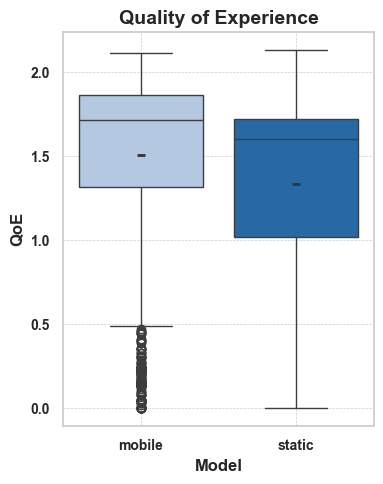

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

final_df = df_runs
final_df = final_df[final_df['model'] == 'minrtt']
# Set the theme
sns.set_theme(style="whitegrid")

# Adjust the figure size for a 2-column paper
plt.figure(figsize=(4, 5))  # Width, Height in inches for one column

# Create a custom color palette
colors = ["#aec7e8", "#126ab9", "#d05d5e"]  # Cool colors

# Create the boxplot with the custom palette
sns.boxplot(data=final_df, x='mobility', y='qoe', palette=colors, orient='v')
sns.pointplot(data=final_df, x='mobility', y='qoe', estimator='mean', ci=None, marker="_", markersize=10, color='#343434', scale=1, join=False)

# Set title and adjust font sizes
plt.title('Quality of Experience', fontsize=14, weight='bold')
plt.xlabel('Model', fontsize=12, weight='bold')
plt.ylabel('QoE', fontsize=12, weight='bold')

# Adjust tick parameters for readability
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')

# Add grid lines for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)


# Adjust the layout to fit into a single column
plt.tight_layout()

# Show the plot
plt.show()

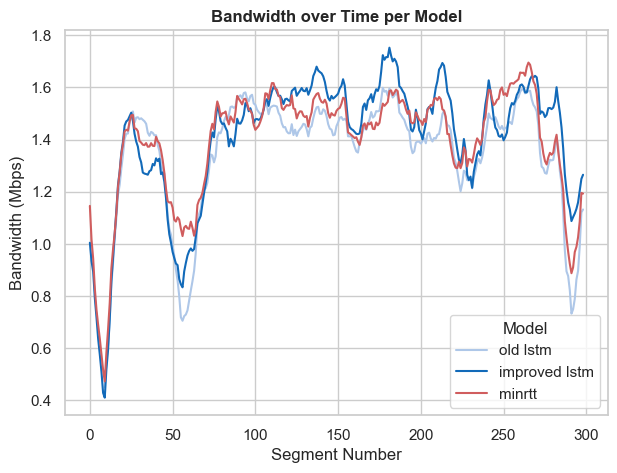

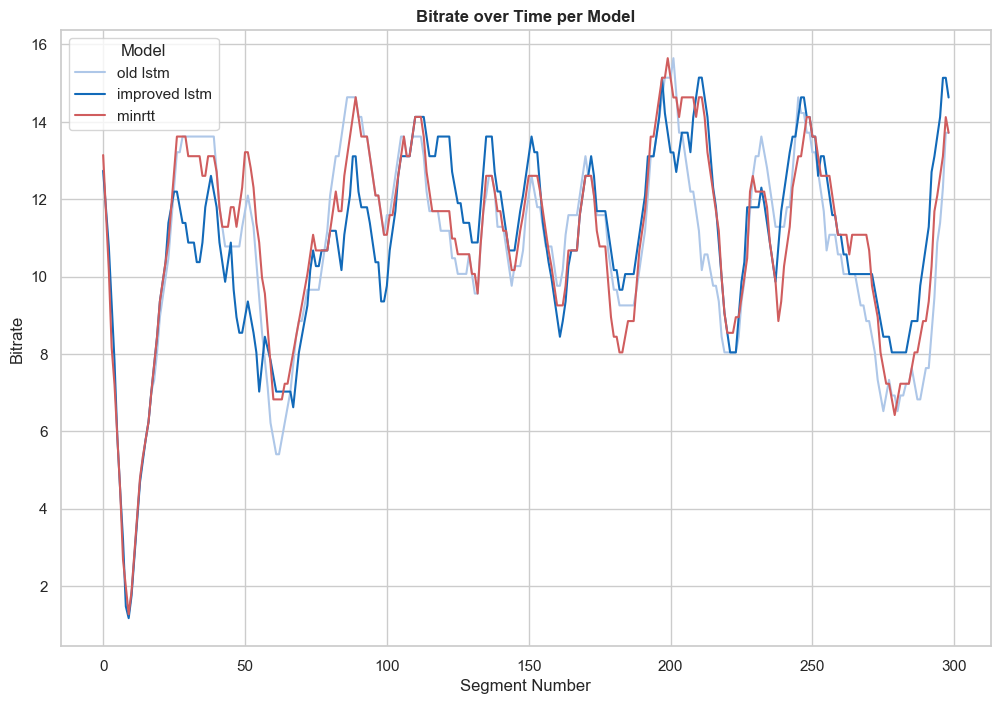

In [71]:
data = df_runs
data = df_runs[df_runs['trace']== 2 ]
# Convert segment_nr to integer for better plotting
data['segment_nr'] = data['segment_nr'].astype(int)
data['bandwidth'] = data['bandwidth'].rolling(10).mean()
data['bitrate'] = data['bitrate'].rolling(10).mean()

colors = ["#aec7e8", "#126ab9", "#d05d5e"]  # Cool colors


# Bandwidth over time for different models
plt.figure(figsize=(7, 5))
sns.lineplot(x='segment_nr', y='bandwidth', hue='model', data=data, palette=colors)
plt.title('Bandwidth over Time per Model', fontsize=12, weight='bold')
plt.xlabel('Segment Number')
plt.ylabel('Bandwidth (Mbps)') 
plt.legend(title='Model')
plt.show()

# Bitrate over time for different models
plt.figure(figsize=(12, 8))
sns.lineplot(x='segment_nr', y='bitrate', hue='model', data=data,  palette=colors)
plt.title('Bitrate over Time per Model', fontsize=12, weight='bold')
plt.xlabel('Segment Number')
plt.ylabel('Bitrate')
plt.legend(title='Model')
plt.show()


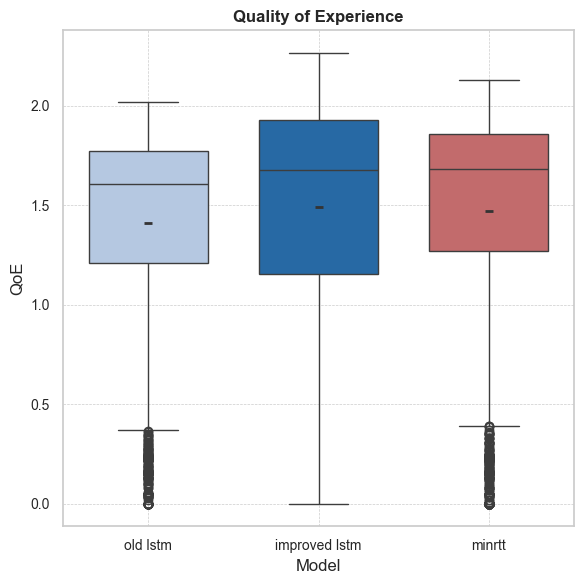

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

final_df = df_runs

# Set the theme
sns.set_theme(style="whitegrid")

# Adjust the figure size for a 2-column paper
plt.figure(figsize=(6, 6))  # Width, Height in inches for one column

# Create a custom color palette
colors = ["#aec7e8", "#126ab9", "#d05d5e"]  # Cool colors

# Create the boxplot with the custom palette
sns.boxplot(data=final_df, x='model', y='qoe', palette=colors, width=0.7, orient='v')
sns.pointplot(data=final_df, x='model', y='qoe', estimator='mean', ci=None, marker="_", markersize=10, color='#343434', scale=1, join=False)

# Set title and adjust font sizes
plt.title('Quality of Experience', fontsize=12, weight='bold')
plt.xlabel('Model')
plt.ylabel('QoE')

# Adjust tick parameters for readability
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add grid lines for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)


# Adjust the layout to fit into a single column
plt.tight_layout()

# Show the plot
plt.show()


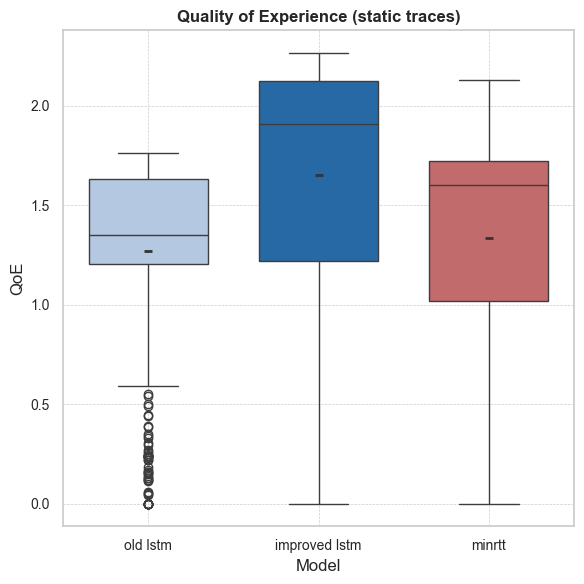

In [81]:
final_df = df_runs[df_runs['mobility']== 'static' ]

# Set the theme
sns.set_theme(style="whitegrid")

# Adjust the figure size for a 2-column paper
plt.figure(figsize=(6, 6))  # Width, Height in inches for one column

# Create a custom color palette
colors = ["#aec7e8", "#126ab9", "#d05d5e"]  # Cool colors

# Create the boxplot with the custom palette
sns.boxplot(data=final_df, x='model', y='qoe', palette=colors,width=0.7, orient='v')
sns.pointplot(data=final_df, x='model', y='qoe', estimator='mean', ci=None, marker="_", markersize=10, color='#343434', scale=1, join=False)

# Set title and adjust font sizes
plt.title('Quality of Experience (static traces)', fontsize=12, weight='bold')
plt.xlabel('Model', fontsize=12)
plt.ylabel('QoE', fontsize=12)

# Adjust tick parameters for readability
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add grid lines for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adjust the layout to fit into a single column
plt.tight_layout()

# Show the plot
plt.show()

In [56]:
final_df['bandwidth']

1495    0.003356
1496    0.525515
1497    0.531683
1498    0.391681
1499    0.552231
          ...   
9044    0.889439
9045    0.954671
9046    1.134642
9047    1.054793
9048    1.014503
Name: bandwidth, Length: 2024, dtype: float64

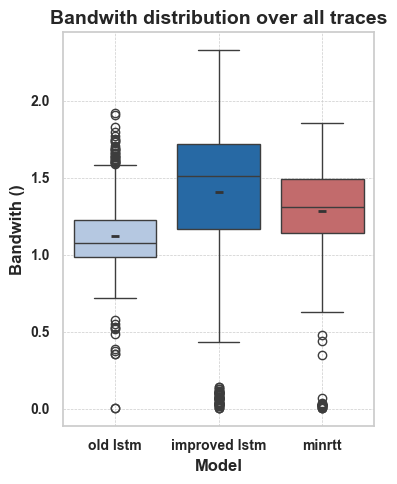

In [57]:
final_df = df_runs[df_runs['mobility']== 'static' ]
# Set the theme
sns.set_theme(style="whitegrid")

# Adjust the figure size for a 2-column paper
plt.figure(figsize=(4, 5))  # Width, Height in inches for one column

# Create a custom color palette
colors = ["#aec7e8", "#126ab9", "#d05d5e"]  # Cool colors

# Create the boxplot with the custom palette
sns.boxplot(data=final_df, x='model', y='bandwidth', palette=colors, orient='v')
sns.pointplot(data=final_df, x='model', y='bandwidth', estimator='mean', ci=None, marker="_", markersize=10, color='#343434', scale=1, join=False)

# Set title and adjust font sizes
plt.title('Bandwith distribution over all traces', fontsize=14, weight='bold')
plt.xlabel('Model', fontsize=12, weight='bold')
plt.ylabel('Bandwith ()', fontsize=12, weight='bold')

# Adjust tick parameters for readability
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')

# Add grid lines for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adjust the layout to fit into a single column
plt.tight_layout()

# Show the plot
plt.show()

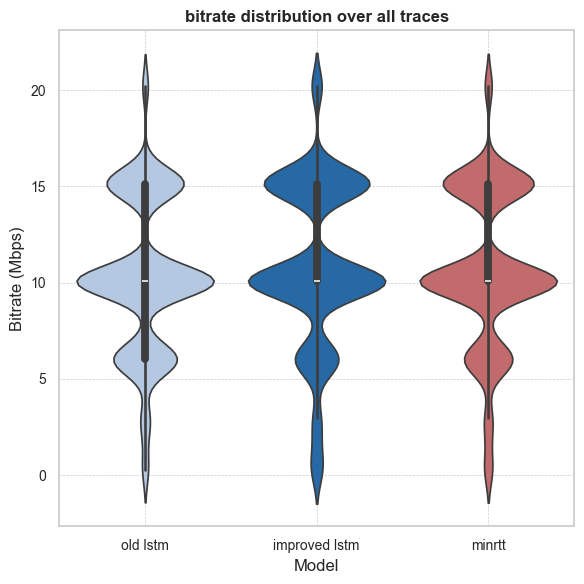

In [64]:
final_df = df_runs #[df_runs['mobility']== 'static' ]
# final_df['bitrate'] = final_df['bitrate'] / 1_000_000
# Set the theme
sns.set_theme(style="whitegrid")

# Adjust the figure size for a 2-column paper
plt.figure(figsize=(6,6))  # Width, Height in inches for one column

# Create a custom color palette
colors = ["#aec7e8", "#126ab9", "#d05d5e"]  # Cool colors

# Create the boxplot with the custom palette
sns.violinplot(data=final_df, x='model', y='bitrate', palette=colors, orient='v')
# sns.pointplot(data=final_df, x='model', y='bitrate', estimator='mean', ci=None, marker="_", markersize=10, color='#343434', scale=1, join=False)

# Set title and adjust font sizes
plt.title('bitrate distribution over all traces', fontsize=12, weight='bold')
plt.xlabel('Model')
plt.ylabel('Bitrate (Mbps)')

# Adjust tick parameters for readability
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add grid lines for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adjust the layout to fit into a single column
plt.tight_layout()

# Show the plot
plt.show()

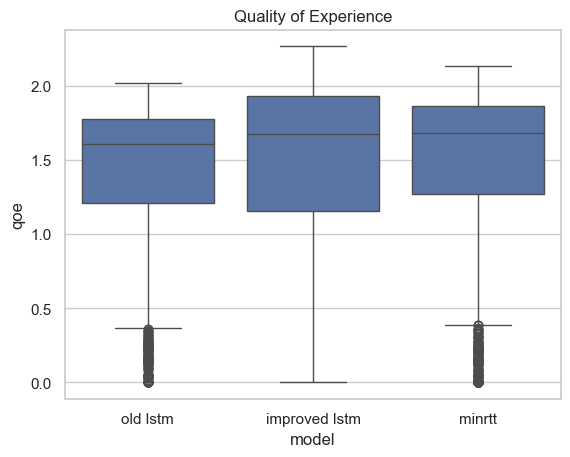

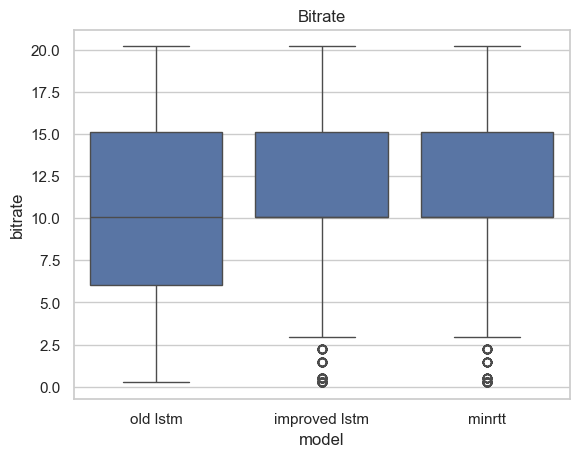

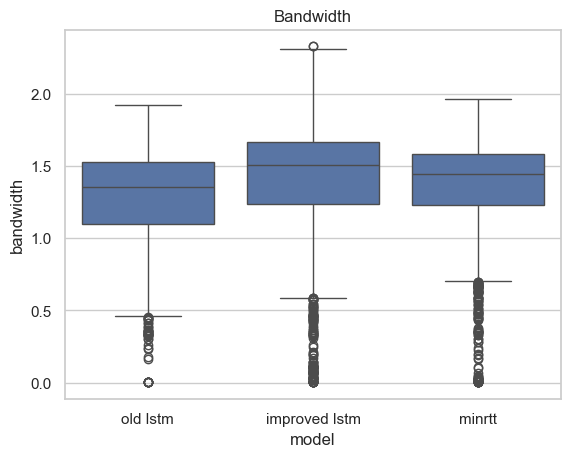

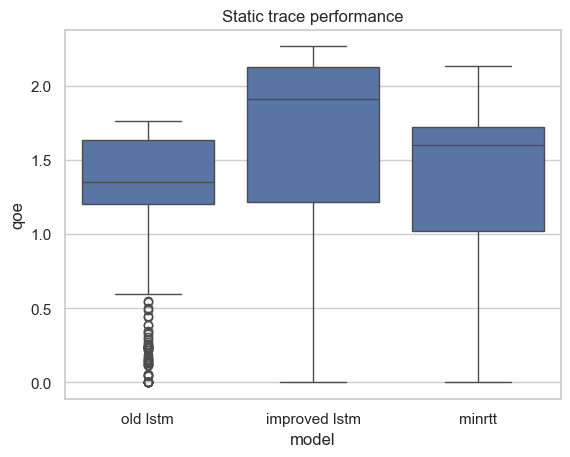

<Axes: xlabel='segment_nr'>

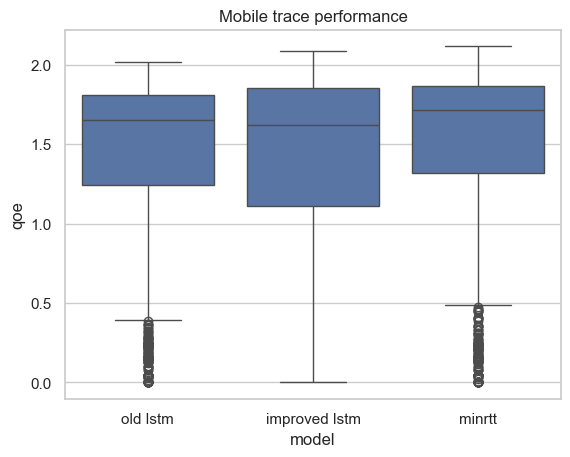

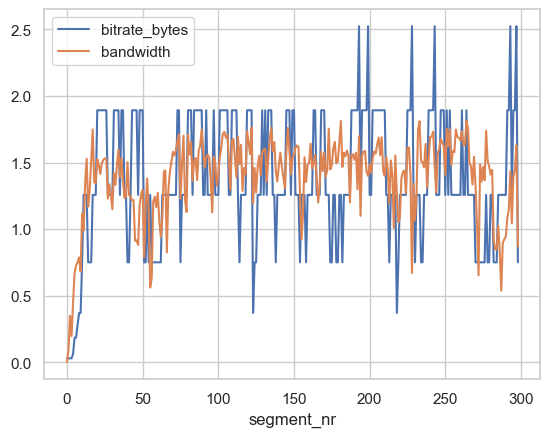

In [59]:
final_df = df_runs

#df_runs = df_runs[df_runs['trace']<4]

#df_runs.groupby(['trace', 'model']).agg({'qoe':'last', 'bitrate':'mean'})
#df_runs.groupby(['model']).agg({'bandwidth':'mean'})
#df_runs.groupby(['model']).agg({'trace_qoe':'mean'})
#df_runs.groupby(['model']).plot(x='model', y='trace_qoe', kind='box')
#plt.boxplot(x=df_runs['model'], y='trace_qoe')
sns.boxplot(data=final_df, x='model', y='qoe', orient='v')
plt.title('Quality of Experience')
plt.show()
sns.boxplot(data=final_df, x='model', y='bitrate', orient='v')
plt.title('Bitrate')
plt.show()
sns.boxplot(data=final_df, x='model', y='bandwidth', orient='v')
plt.title('Bandwidth')
plt.show()
sns.boxplot(data=final_df[final_df['mobility']=='static'], x='model', y='qoe')
plt.title('Static trace performance')
plt.show()
sns.boxplot(data=final_df[final_df['mobility']=='mobile'], x='model', y='qoe')
plt.title('Mobile trace performance')

final_df['bitrate_bytes'] = final_df['bitrate']/8
final_df[(final_df['model']=='minrtt') & (final_df['trace']==2)].plot(x='segment_nr', y=['bitrate_bytes', 'bandwidth']) #, kind='scatter'
#df_runs.groupby(['trace', 'model']).agg({'bwd_path0':'mean'})

In [60]:
df_runs.groupby(['trace', 'model']).agg({'qoe':'last', 'bitrate':'mean'})

qoe    bitrate
trace model                             
1     improved lstm  2.029999  11.181039
      minrtt         2.046571  11.282985
      old lstm       1.923877  10.912287
2     improved lstm  1.879599  10.872298
      minrtt         1.952247  10.967436
      old lstm       1.868932  10.702884
3     improved lstm  2.025794  11.602972
      minrtt         1.939510  11.049877
      old lstm       1.818363  10.617679
4     improved lstm  1.868455  10.914172
      minrtt         1.818789  10.472817
      old lstm       1.658821  10.163651
5     improved lstm  1.850202  10.887537
      minrtt         1.653400   9.982842
      old lstm       1.369790   8.809809
6     improved lstm  1.489070  10.940744
      minrtt         1.752299  10.853015
      old lstm       1.807678  10.808357
7     improved lstm  1.942055  10.759156
      minrtt         1.858116  10.552467
      old lstm       1.830924  10.331731
8     improved lstm  1.894132  10.933893
      minrtt         1.854451  10.784216
      old lstm       1.797075  10.373354
9     improved lstm  1.218011  10.568375
      minrtt         0.000000  10.223618
      old lstm       1.633240   9.639505

In [61]:
df_runs[(df_runs['model']=='lstm') & (df_runs['trace']=='9')][['bwd_path0','bwd_path1']].plot()
plt.show()
df_runs[(df_runs['model']=='minrtt') & (df_runs['trace']=='9')][['bwd_path0','bwd_path1']].iloc[100:].plot()

KeyError: "None of [Index(['bwd_path0', 'bwd_path1'], dtype='object')] are in the [columns]"

In [ ]:



falcon = "central_service/runs/20240515_21_52_35_FALCON_train/"
read(falcon)

['central_service', 'runs', '20240515_21_52_35_falcon_train', '']
['central_service', 'runs', '20240515_21_52_35_falcon_train', '']
['central_service', 'runs', '20240515_21_52_35_falcon_train', '']
['central_service', 'runs', '20240515_21_52_35_falcon_train', '']
['central_service', 'runs', '20240515_21_52_35_falcon_train', '']
['central_service', 'runs', '20240515_21_52_35_falcon_train', '']
['central_service', 'runs', '20240515_21_52_35_falcon_train', '']
['central_service', 'runs', '20240515_21_52_35_falcon_train', '']
['central_service', 'runs', '20240515_21_52_35_falcon_train', '']
['central_service', 'runs', '20240515_21_52_35_falcon_train', '']
